In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('D:\Data\Mylecture\DATA7901\Cases_Dataset\covid_19_data.csv')
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


首先初步勘察数据表情况, 我只需要湖北武汉的疫情数据.

In [59]:
df = df.loc[df['Province/State'] == 'Hubei']
df.drop(['SNo', 'Province/State', 'Country/Region', 'Last Update'], axis=1, inplace=True)

d:\Applications\Pyrhon37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [60]:
df

,ObservationDate,Confirmed,Deaths,Recovered
13,01/22/2020,444.0,17.0,28.0
49,01/23/2020,444.0,17.0,28.0
53,01/23/2020,444.0,17.0,28.0
88,01/24/2020,549.0,24.0,31.0
131,01/25/2020,761.0,40.0,32.0
...,...,...,...,...
302971,05/25/2021,68159.0,4512.0,63645.0
303736,05/26/2021,68159.0,4512.0,63645.0
304501,05/27/2021,68159.0,4512.0,63645.0
305266,05/28/2021,68159.0,4512.0,63645.0


In [61]:
df = df.drop_duplicates()
df

,ObservationDate,Confirmed,Deaths,Recovered
13,01/22/2020,444.0,17.0,28.0
49,01/23/2020,444.0,17.0,28.0
88,01/24/2020,549.0,24.0,31.0
131,01/25/2020,761.0,40.0,32.0
177,01/26/2020,1058.0,52.0,42.0
...,...,...,...,...
302971,05/25/2021,68159.0,4512.0,63645.0
303736,05/26/2021,68159.0,4512.0,63645.0
304501,05/27/2021,68159.0,4512.0,63645.0
305266,05/28/2021,68159.0,4512.0,63645.0


In [62]:
df.reset_index(drop=True, inplace=True)
df

,ObservationDate,Confirmed,Deaths,Recovered
0,01/22/2020,444.0,17.0,28.0
1,01/23/2020,444.0,17.0,28.0
2,01/24/2020,549.0,24.0,31.0
3,01/25/2020,761.0,40.0,32.0
4,01/26/2020,1058.0,52.0,42.0
...,...,...,...,...
489,05/25/2021,68159.0,4512.0,63645.0
490,05/26/2021,68159.0,4512.0,63645.0
491,05/27/2021,68159.0,4512.0,63645.0
492,05/28/2021,68159.0,4512.0,63645.0


In [63]:
DailyAdded = np.zeros(len(df))

计算每日新增

In [64]:
for index in range(1, len(df)):
    DailyAdded[index - 1] = df.loc[index, 'Confirmed'] - df.loc[index - 1, 'Confirmed']

发现自3/16/2020之后, 每日进行几乎为0. 为此, 我们观察一下从开始至记录结束之时的总感染人口增长变化.

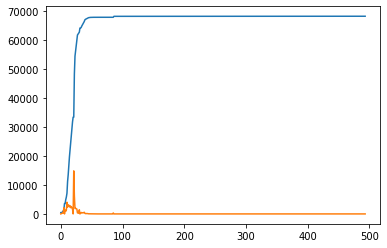

In [65]:
x = np.linspace(0, 493, num=494)
plt.plot(x, df.Confirmed)
plt.plot(x, DailyAdded)

Optimization terminated successfully.
         Current function value: 1286416085.590878
         Iterations: 24
         Function evaluations: 48
infection probaility:  [0.03791779]
basic reproduction number: 2.654244995117187


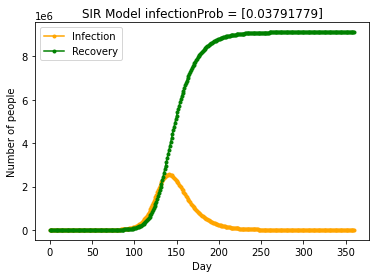

In [5]:
from SIR_fit_predict import *
import pandas as pd
import datetime

df = pd.read_csv('D:\Data\Mylecture\DATA7901\Cases_Dataset\covid_19_data.csv')
df = df.loc[df['Province/State'] == 'Hubei']
df.drop(['SNo', 'Province/State', 'Country/Region', 'Last Update'], axis=1, inplace=True)
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)

nContact = int(5)
gamma = 1/14
startTime = datetime.datetime.strptime('2019-12-08', "%Y-%m-%d")
estUsedTimeBox = [datetime.datetime.strptime('2020-01-22', "%Y-%m-%d"), datetime.datetime.strptime('2020-03-16', "%Y-%m-%d")]
estInfectionProb = estimationInfectionProb(df, startTime, estUsedTimeBox, nContact, gamma)

estInfectionProb.setInitSolution(0.04)
infectionProb = estInfectionProb.optimize()
basicRN = estInfectionProb.getBasicReproductionNumber()

N = 10**7
k = 5
beta = k * infectionProb
SIRModel_ = SIRModel(N, beta, gamma, infectionProb)
SIRModel_.solve()
SIRModel_.report()
solution = SIRModel_.solution

In [ ]:
estUsedTimeIndexBox = [(t - startTime).days for t in estUsedTimeBox]
timeRange = np.array([i for i in range(estUsedTimeIndexBox[0], estUsedTimeIndexBox[1] + 1)])
dataStartTimeStep = estUsedTimeIndexBox[0]
df.loc[(timeRange - dataStartTimeStep),'Confirmed']
# [print(timeRange)]

0       444.0
1       444.0
2       549.0
3       761.0
4      1058.0
5      1423.0
6      3554.0
7      3554.0
8      4903.0
9      5806.0
10     7153.0
11    11177.0
12    13522.0
13    16678.0
14    19665.0
15    22112.0
16    24953.0
17    27100.0
18    29631.0
19    31728.0
20    33366.0
21    33366.0
22    48206.0
23    54406.0
24    56249.0
25    58182.0
26    59989.0
27    61682.0
28    62031.0
29    62442.0
30    62662.0
31    64084.0
32    64084.0
33    64287.0
34    64786.0
35    65187.0
36    65596.0
37    65914.0
38    66337.0
39    66907.0
40    67103.0
41    67217.0
42    67332.0
43    67466.0
44    67592.0
45    67666.0
46    67707.0
47    67743.0
48    67760.0
49    67773.0
50    67781.0
51    67786.0
52    67790.0
53    67794.0
54    67798.0
Name: Confirmed, dtype: float64

In [ ]:
infectionProb = 0.04
(infectionProb * nContact - gamma) * timeRange

array([ 5.78571429,  5.91428571,  6.04285714,  6.17142857,  6.3       ,
        6.42857143,  6.55714286,  6.68571429,  6.81428571,  6.94285714,
        7.07142857,  7.2       ,  7.32857143,  7.45714286,  7.58571429,
        7.71428571,  7.84285714,  7.97142857,  8.1       ,  8.22857143,
        8.35714286,  8.48571429,  8.61428571,  8.74285714,  8.87142857,
        9.        ,  9.12857143,  9.25714286,  9.38571429,  9.51428571,
        9.64285714,  9.77142857,  9.9       , 10.02857143, 10.15714286,
       10.28571429, 10.41428571, 10.54285714, 10.67142857, 10.8       ,
       10.92857143, 11.05714286, 11.18571429, 11.31428571, 11.44285714,
       11.57142857, 11.7       , 11.82857143, 11.95714286, 12.08571429,
       12.21428571, 12.34285714, 12.47142857, 12.6       , 12.72857143])